## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import and put the train and test datasets in  pandas dataframe

In [5]:
test = pd.read_csv('1.+cervicalcancer-original+dataset.csv')
test.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### 1.3 check the data.describe()

In [6]:
test.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [43]:
test.replace('?', np.nan)
test = test.convert_objects(convert_numeric=True)
test.isnull().sum()

C:\Users\Krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [14]:
test['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

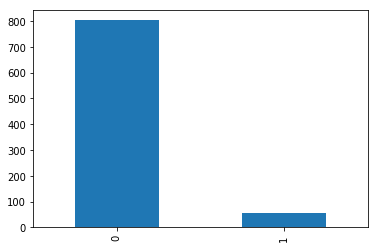

In [24]:
test['Biopsy'].value_counts().plot.bar()

observation:
   


Data is imbalanced.

### 1.6 Check Correlation Plot. And your observations?

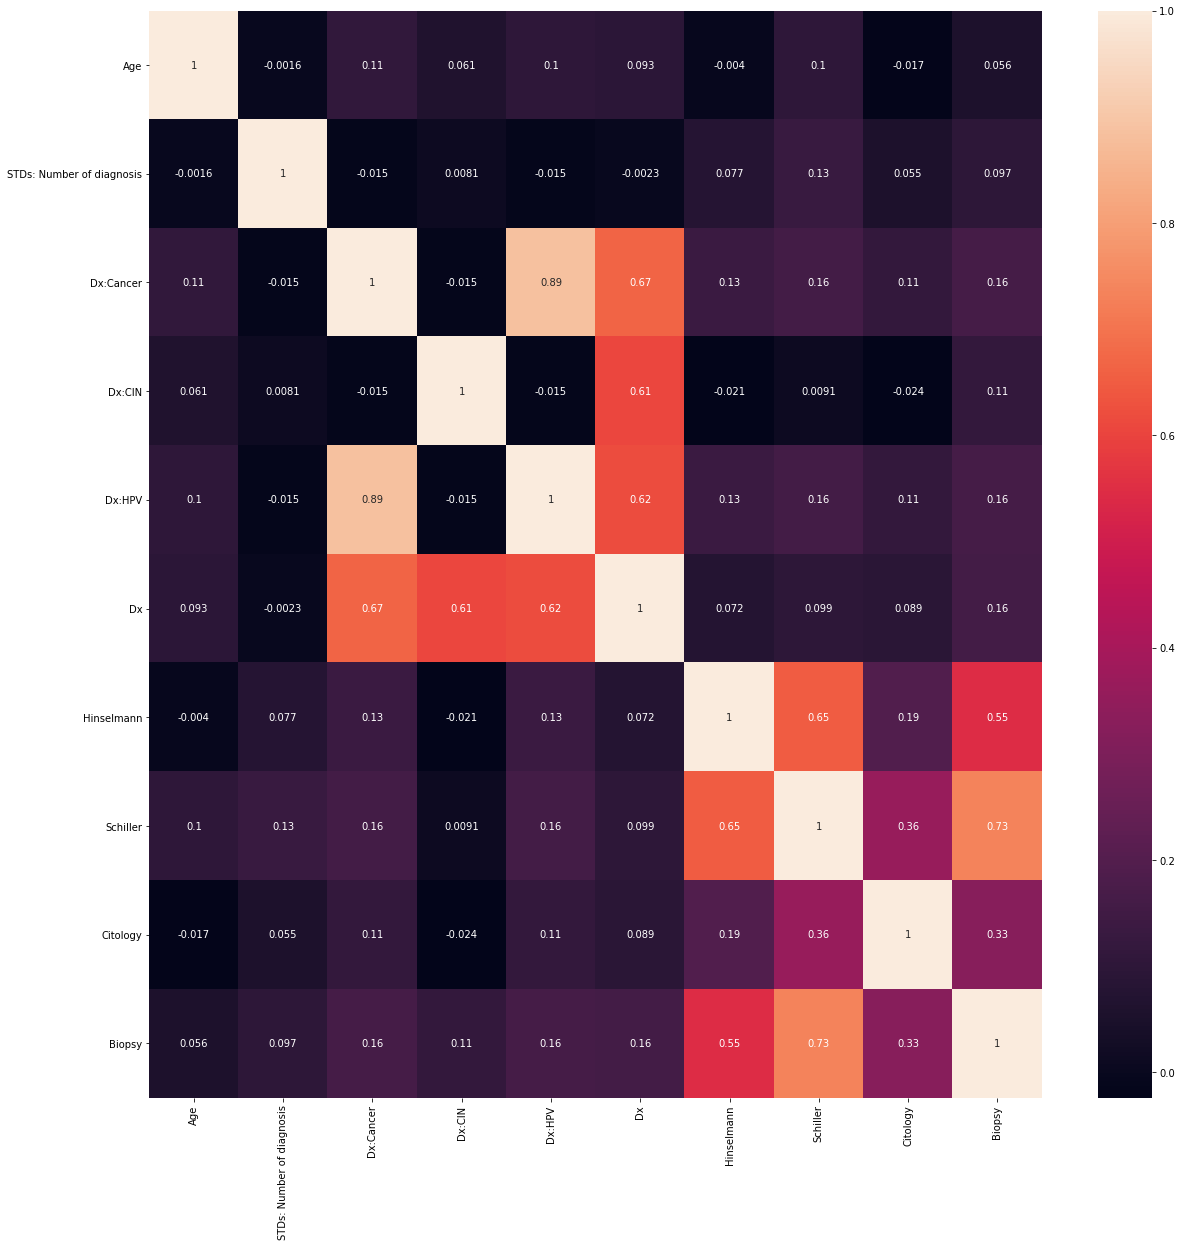

In [31]:
# correlation plot

correlation = test.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(correlation, annot=True)

#### observation:
    

### 1.6a) list the heatmap of top correlation


In [3]:
# list the heatmap of top correlation



# number of variables for heatmap


#### observation:
    

### 1.7 Imputing the missing values from the given dataset?

In [71]:
# we will impute the categorical variables with 0 or 1 and continuous variables with median value

test['Number of sexual partners'] = test['Number of sexual partners'].fillna(test['Number of sexual partners'].median())
test['Number of sexual partners'].isnull().any()
test.head()




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [58]:
# Imputing the missing values from First sexual intercourse

test['First sexual intercourse'] = test['First sexual intercourse'].fillna(test['First sexual intercourse'].median())
test['First sexual intercourse'].isnull().any()

False

In [57]:
# Imputing the missing values from Num of pregnancies

test['Num of pregnancies'] = test['Num of pregnancies'].fillna(test['Num of pregnancies'].median())
test['Num of pregnancies'].isnull().any()

False

In [59]:
# Imputing the missing values from Smokes

test['Smokes'] = test['Smokes'].fillna(test['Smokes'].median())
test['Smokes'].isnull().any()



False

In [60]:
# Imputing the missing values from Smokes (years)


test['Smokes (packs/year)'] = test['Smokes (packs/year)'].fillna(test['Smokes (packs/year)'].median())
test['Smokes (packs/year)'].isnull().any()

False

In [61]:
# Imputing the missing values from Smokes Smokes (packs/year)

test['Smokes (packs/year)'] = test['Smokes (packs/year)'].fillna(test['Smokes (packs/year)'].median())
test['Smokes (packs/year)'].isnull().any()

False

In [62]:
# Imputing the missing values from Hormonal Contraceptives

test['Hormonal Contraceptives'] = test['Hormonal Contraceptives'].fillna(test['Hormonal Contraceptives'].median())
test['Hormonal Contraceptives'].isnull().any()


False

In [63]:
# Imputing the missing values from Hormonal Contraceptives (years)
test['Hormonal Contraceptives (years)'] = test['Hormonal Contraceptives (years)'].fillna(test['Hormonal Contraceptives (years)'].mean())
test['Hormonal Contraceptives (years)'].isnull().any()


False

In [65]:
# Imputing the missing values from IUD

test['IUD'] = test['IUD'].fillna(test['IUD'].mean())
test['IUD'].isnull().any()


False

In [68]:
# Imputing the missing values from IUD (year
test['IUD (years)'] = test['IUD (years)'].fillna(test['IUD (years)'].mean())
test['IUD (years)'].isnull().any()


False

In [72]:
# Imputing the missing values from STDs

test['STDs'] = test['STDs'].fillna(test['STDs'].mean())
test['STDs'].isnull().any()
test['STDs'].value_counts()

0.000000    674
0.104914    105
1.000000     79
Name: STDs, dtype: int64

In [15]:
# Imputing the missing values from STDs (number)

test['IUD (years)'] = test['IUD (years)'].fillna(test['IUD (years)'].mean())
test['IUD (years)'].isnull().any()

In [73]:
# Imputing the missing values from STDs:condylomatosis

test['STDs:condylomatosis'] = test['STDs:condylomatosis'].fillna(test['STDs:condylomatosis'].mean())
test['STDs:condylomatosis'].isnull().any()

False

In [74]:
# Imputing the missing values from STDs:cervical condylomatosis
test['STDs:cervical condylomatosis'] = test['STDs:cervical condylomatosis'].fillna(test['STDs:cervical condylomatosis'].median())
test['STDs:cervical condylomatosis'].isnull().any()


False

In [75]:
# Imputing the missing values from STDs:vaginal condylomatosis


test['STDs:vaginal condylomatosis'] =test['STDs:vaginal condylomatosis'].fillna(test['STDs:vaginal condylomatosis'].median())
test['STDs:vaginal condylomatosis'].isnull().any()
                                                  


False

In [76]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

test['STDs:vulvo-perineal condylomatosis'] = test['STDs:vulvo-perineal condylomatosis'].fillna(test['STDs:vulvo-perineal condylomatosis'].median())
test['STDs:vulvo-perineal condylomatosis'].isnull().any()


False

In [20]:
# Imputing the missing values from STDs:syphilis


test['STDs:syphilis'] = test['STDs:syphilis'].fillna(test['STDs:syphilis'].median())
test['STDs:syphilis'].isnull().any()


In [80]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

test['STDs:pelvic inflammatory disease'] = test['STDs:pelvic inflammatory disease'].fillna(test['STDs:pelvic inflammatory disease'].median())
test['STDs:pelvic inflammatory disease'].isnull().any()




False

In [82]:
# Imputing the missing values from STDs:genital herpes

test['STDs:genital herpes'] = test['STDs:genital herpes'].fillna(test['STDs:genital herpes'].median())
test['STDs:genital herpes'].isnull().any()


False

In [83]:
# Imputing the missing values from STDs:molluscum contagiosum

test['STDs:molluscum contagiosum'] = test['STDs:molluscum contagiosum'].fillna(test['STDs:molluscum contagiosum'].median())
test['STDs:molluscum contagiosum'].isnull().any()



False

In [84]:
# Imputing the missing values from STDs:AIDS


test['STDs:AIDS'] = test['STDs:AIDS'].fillna(test['STDs:AIDS'].median())
test['STDs:AIDS'].isnull().any()


False

In [85]:
# Imputing the missing values from STDs:HIV

test['STDs:HIV'] = test['STDs:HIV'].fillna(test['STDs:HIV'].median())
test['STDs:HIV'].isnull().any()



False

In [86]:
# Imputing the missing values from STDs:Hepatitis B


test['STDs:Hepatitis B'] = test['STDs:Hepatitis B'].fillna(test['STDs:Hepatitis B'].median())
test['STDs:Hepatitis B'].isnull().any()



False

In [27]:
# Imputing the missing values from STDs:HPV

test['STDs:HPV'] = test['STDs:HPV'].fillna(test['STDs:HPV'].median())

data['STDs:HPV'].isnull().any()

In [87]:
# Imputing the missing values from STDs: Time since first diagnosis

test['STDs: Time since first diagnosis'] = test['STDs: Time since first diagnosis'].fillna(test['STDs: Time since first diagnosis'].median())
test['STDs: Time since first diagnosis'].isnull().any()


False

In [88]:
# Imputing the missing values from STDs: Time since last diagnosis

test['STDs: Time since last diagnosis'] = test['STDs: Time since last diagnosis'].fillna(test['STDs: Time since last diagnosis'].median())
test['STDs: Time since last diagnosis'].isnull().any()


False

###  1.8 Imputing null values for categorical variables for get_dummies

In [91]:
test = pd.get_dummies(data = test, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

test.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes (years)                         13
Smokes (packs/year)                     0
Hormonal Contraceptives (years)         0
IUD (years)                             0
STDs (number)                         105
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                         105
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                        0
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis        0
STDs: Time since last diagnosis   

### 1.10 Data Visualization for checking any categorical variables or not using count plot?

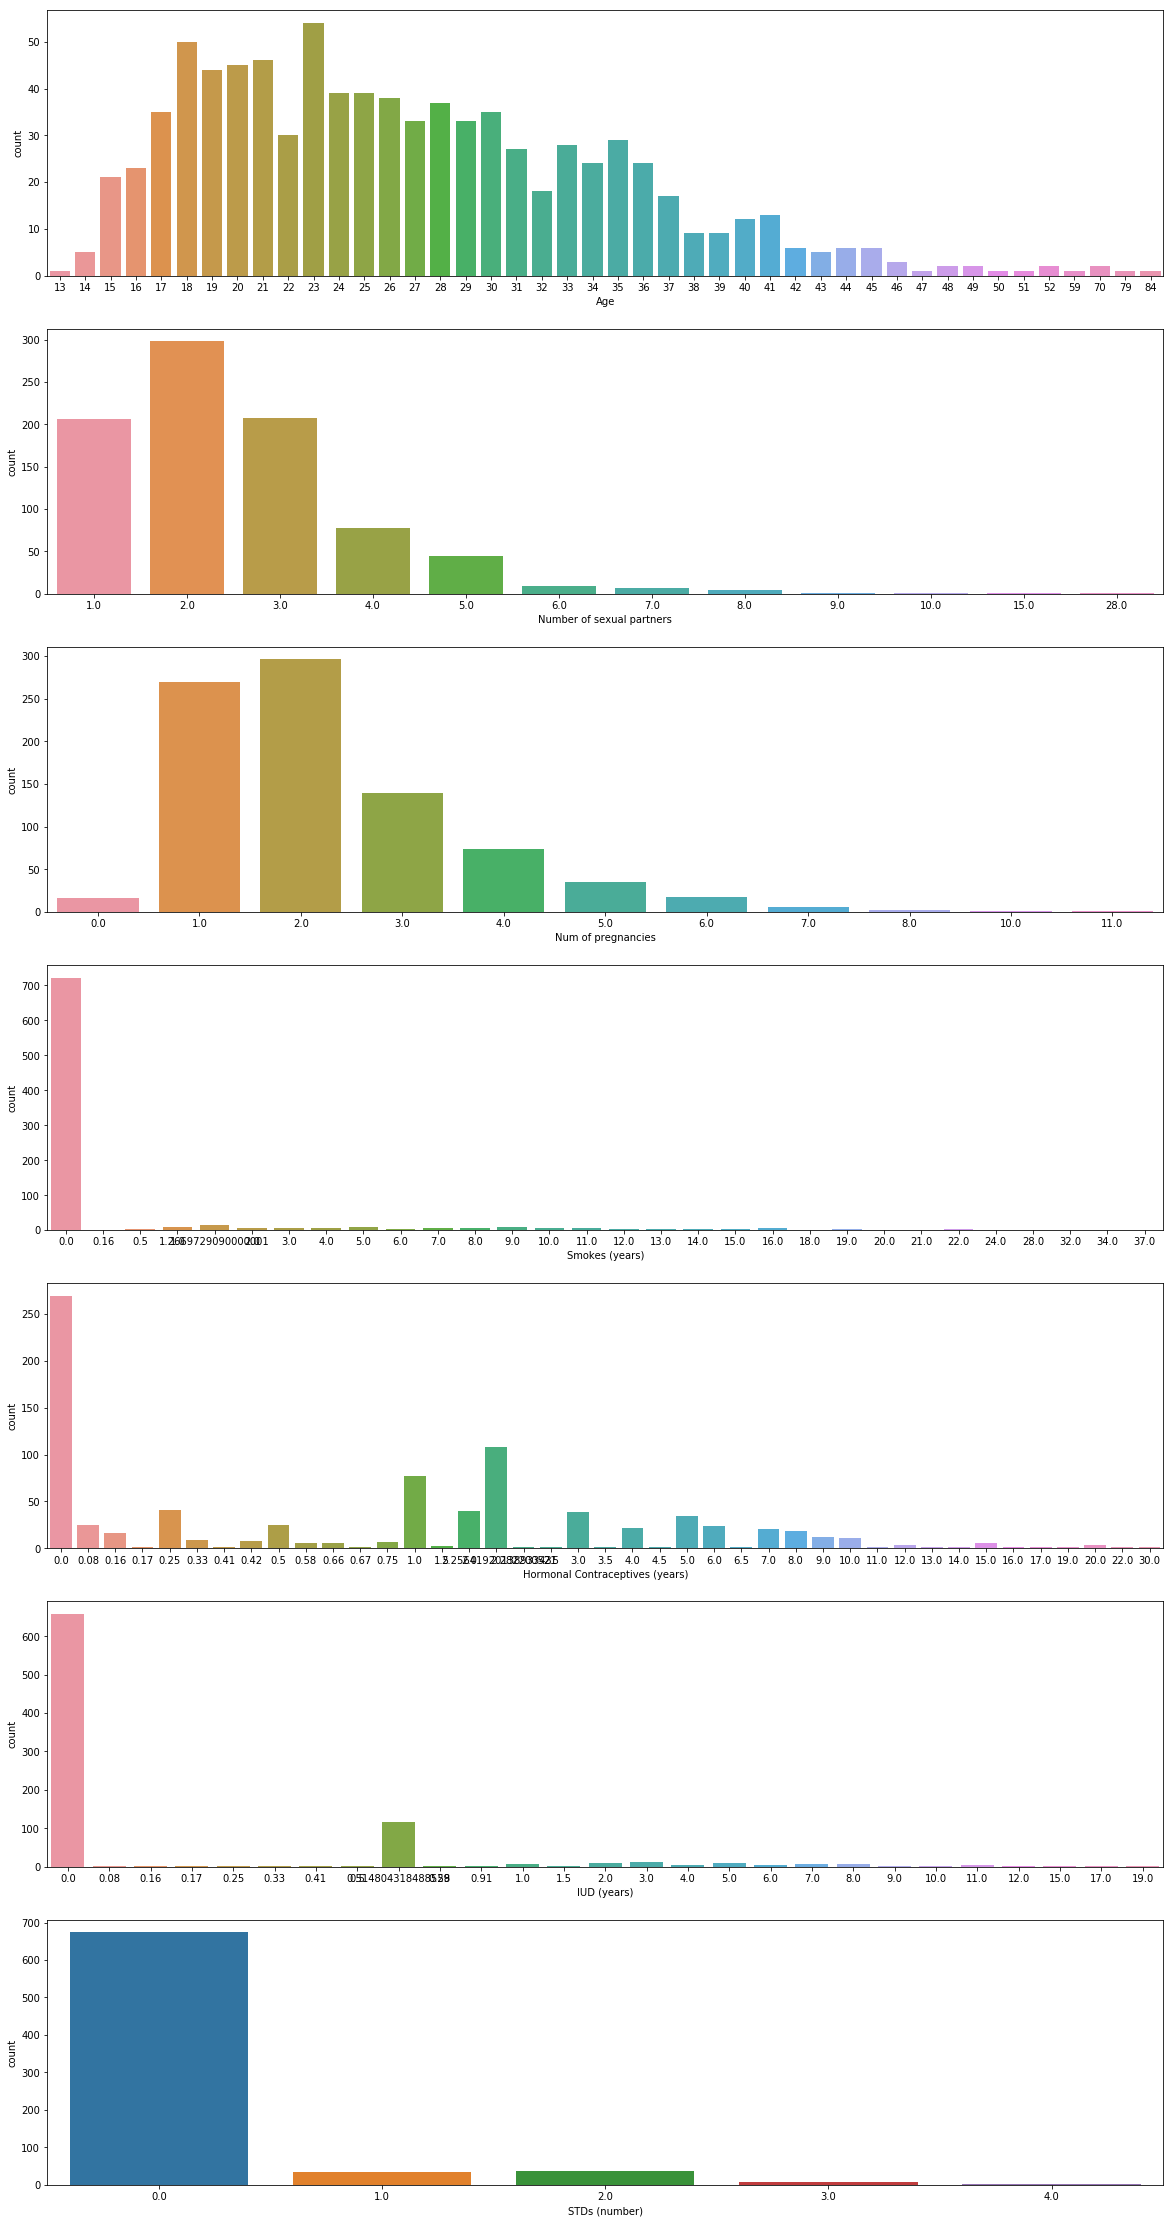

In [92]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=test, ax=ax1)
sns.countplot(x='Number of sexual partners', data=test, ax=ax2)
sns.countplot(x='Num of pregnancies', data=test, ax=ax3)
sns.countplot(x='Smokes (years)', data=test, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=test, ax=ax5)
sns.countplot(x='IUD (years)', data=test, ax=ax6)
sns.countplot(x='STDs (number)', data=test, ax=ax7)

### 1.11 splitting the dataset into dependent and independent variables?

In [94]:
x = test.iloc[:,:46]
y = test.iloc[:,46]

print(x.shape)
print(y.shape)


(858, 46)
(858,)


### 1.12 splitting the dataset into  training and test set?

# The End